# Orbital Mechanics and simple application to Black Holes
### Code Modified from MatLab Simulation
 https://matlabsimulation.com/black-hole-simulation-python/

Look up (from accredited sources!) the values of G and the mass of the sun in kg. You also need to input Newton's law of gravity. Make sure you note down either to yourself or here where you got the numbers from!

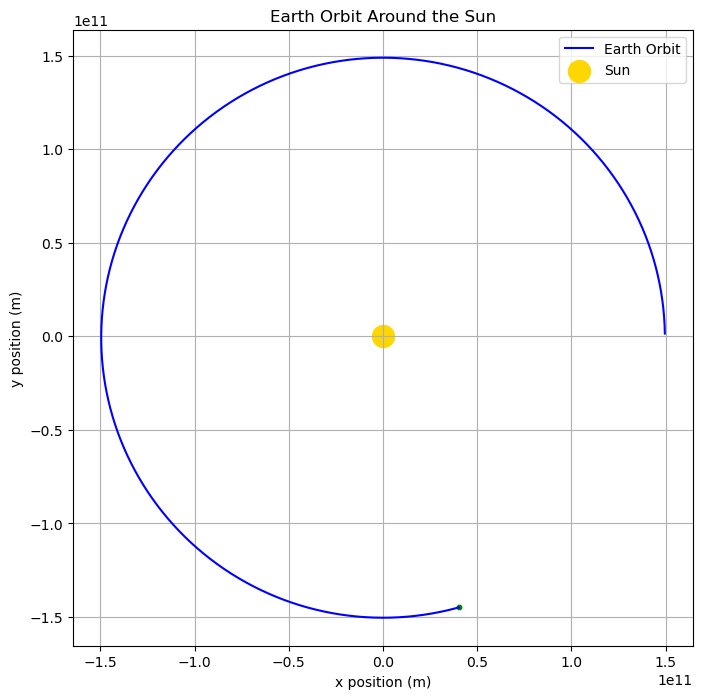

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Constants
G = 6.67*10**-11  # Gravitational constant FILL IN
M_sun = 1.989*10**30  # Mass of the Sun in kg FILL IN

dt = 50000  # Time step in seconds (seconds, to simulate over a long period)
num_particles = 1  # We are simulating just Earth's orbit

# Initial position and velocity for Earth (1 AU from the Sun)
positions = np.array([[1.496e11, 0]]) 
# Velocity of Earth (circular velocity at 1 AU)
v_circular = np.sqrt(G * M_sun / np.linalg.norm(positions[0])) 
velocities = np.array([[0, v_circular]])  # Velocity is tangential to the orbit

# Gravitational force calculation
def compute_gravitational_force(positions):
    forces = np.zeros_like(positions)
    for i in range(len(positions)):
        r = np.linalg.norm(positions[i])
        force_magnitude = (G*M_sun)/r**2 # Newton's law of gravity FILL IN
        force_direction = -positions[i] / r
        forces[i] = force_magnitude * force_direction
    return forces

# Update position and velocity functions
def update_positions(positions, velocities, dt):
    return positions + velocities * dt

def update_velocities(velocities, forces, dt):
    return velocities + forces * dt

# Simulation function
def simulate_orbit(positions, velocities, dt, num_steps):
    trajectories = np.zeros((num_steps, num_particles, 2))
    for step in range(num_steps):
        forces = compute_gravitational_force(positions)
        velocities = update_velocities(velocities, forces, dt)
        positions = update_positions(positions, velocities, dt)
        trajectories[step] = positions
    return trajectories, positions

# Run the simulation
num_steps = 500
trajectories, final_positions = simulate_orbit(positions, velocities, dt, num_steps)

# Plot the results
plt.figure(figsize=(8, 8))
plt.plot(trajectories[:, 0, 0], trajectories[:, 0, 1], color='blue', label='Earth Orbit')

plt.scatter(final_positions[:, 0], final_positions[:, 1], color='green', s=10)

# Mark the Sun's position
plt.scatter(0, 0, color='gold', s=250, label='Sun')

plt.xlabel('x position (m)')
plt.ylabel('y position (m)')
plt.title('Earth Orbit Around the Sun')
plt.legend()
plt.grid()
plt.show()


Now we want to simulate a black hole in place of our own sun! Let's make things a bit more interesting by placing some particles at random distances from the black hole

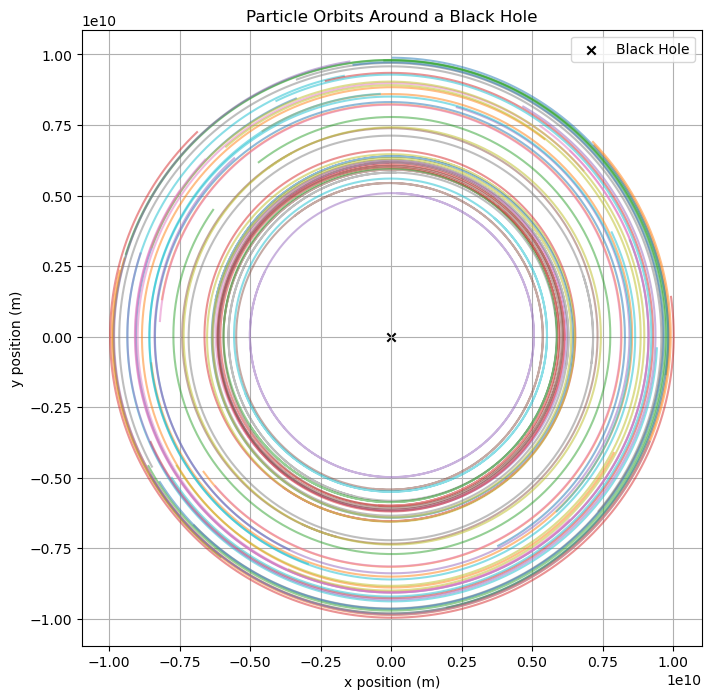

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Constants
G = 6.67430e-11  # Gravitational constant (m^3 kg^-1 s^-2)
M = 1e30  # Black hole mass (about 1 solar mass)
dt = 1000  # Time step in seconds
num_steps = 500  # Number of simulation steps

# Particle initialization
num_particles = 50
radii = np.random.uniform(5e9, 1e10, num_particles)  # Random distances from BH
angles = np.random.uniform(0, 2*np.pi, num_particles)  # Random angles
positions = np.column_stack((radii * np.cos(angles), radii * np.sin(angles)))  # Convert to Cartesian

# Initial velocities (circular orbits for simplicity)
velocities = np.zeros((num_particles, 2))
for i in range(num_particles):
    r = np.linalg.norm(positions[i])
    v_mag = np.sqrt(G * M / r)  # Circular velocity
    velocities[i] = v_mag * np.array([-np.sin(angles[i]), np.cos(angles[i])])  # Tangential velocity

# Gravity function
def compute_gravitational_force(positions):
    forces = np.zeros_like(positions)
    for i in range(len(positions)):
        r = np.linalg.norm(positions[i])
        force_magnitude = G * M / r**2 # Newton's law of gravity
        force_direction = -positions[i] / r
        forces[i] = force_magnitude * force_direction
    return forces

# Update functions
def update_positions(positions, velocities, dt):
    return positions + velocities * dt

def update_velocities(velocities, forces, dt):
    return velocities + forces * dt

# Simulation function
def simulate_black_hole(positions, velocities, dt, num_steps):
    trajectories = np.zeros((num_steps, num_particles, 2))
    for step in range(num_steps):
        forces = compute_gravitational_force(positions)
        velocities = update_velocities(velocities, forces, dt)
        positions = update_positions(positions, velocities, dt)
        trajectories[step] = positions
    return trajectories

# Run the simulation
trajectories = simulate_black_hole(positions, velocities, dt, num_steps)

# Plot the results
plt.figure(figsize=(8, 8))
for i in range(num_particles):
    plt.plot(trajectories[:, i, 0], trajectories[:, i, 1], alpha=0.5)
plt.scatter(0, 0, color='black', marker='x', label='Black Hole')  # Black hole at origin
plt.xlabel('x position (m)')
plt.ylabel('y position (m)')
plt.title('Particle Orbits Around a Black Hole')
plt.legend()
plt.grid()
plt.show()


Well that looks... odd and not quite what we would expect. What could possibly be wrong here?

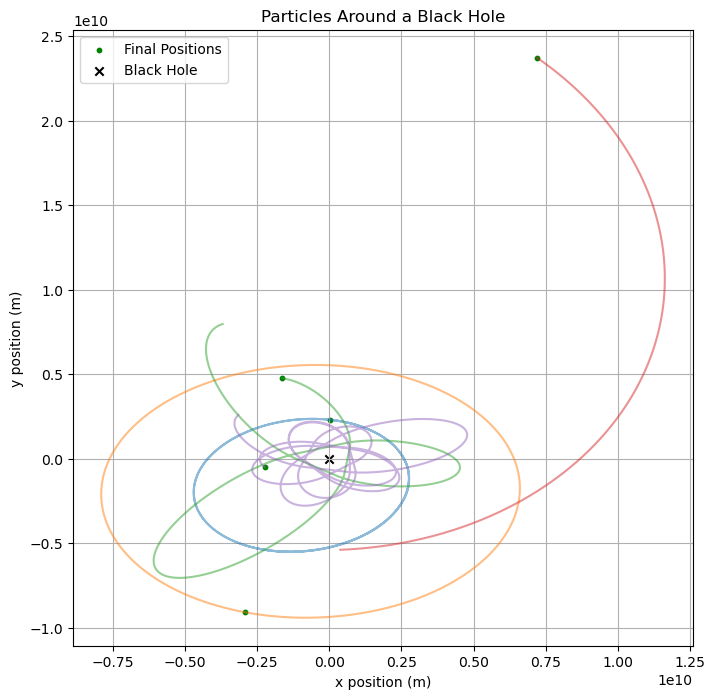

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Constants
G = 6.67430e-11  # Gravitational constant (m^3 kg^-1 s^-2)
M = 1e30  # Black hole mass (~1 solar mass)
dt = 1000  # Time step in seconds
num_steps = 500  # Number of simulation steps

# Particle initialization
num_particles = 5
radii = np.random.uniform(3e9, 1e10, num_particles)  # Random distances from BH (above Schwarzschild radius)
angles = np.random.uniform(0, 2*np.pi, num_particles)  # Random angles
positions = np.column_stack((radii * np.cos(angles), radii * np.sin(angles)))  # Convert to Cartesian

# Randomize initial velocities
velocities = np.zeros((num_particles, 2))
for i in range(num_particles):
    r = np.linalg.norm(positions[i])
    v_circular = np.sqrt(G * M / r)  # Circular velocity
    v_random = np.random.uniform(0, 1.5 * v_circular)  # Some below, some above circular speed
    velocities[i] = v_random * np.array([-np.sin(angles[i]), np.cos(angles[i])])  # Tangential velocity

# Gravity function
def compute_gravitational_force(positions):
    forces = np.zeros_like(positions)
    for i in range(len(positions)):
        r = np.linalg.norm(positions[i])
        if r < 1e9:  # Approaching event horizon (approximate Schwarzschild radius)
            continue  # Skip force calculation (simulate "falling in")
        force_magnitude = G * M / r**2
        force_direction = -positions[i] / r
        forces[i] = force_magnitude * force_direction
    return forces

# Update functions
def update_positions(positions, velocities, dt):
    return positions + velocities * dt

def update_velocities(velocities, forces, dt):
    return velocities + forces * dt

# Simulation function
def simulate_black_hole(positions, velocities, dt, num_steps):
    trajectories = np.zeros((num_steps, num_particles, 2))
    for step in range(num_steps):
        forces = compute_gravitational_force(positions)
        velocities = update_velocities(velocities, forces, dt)
        positions = update_positions(positions, velocities, dt)
        trajectories[step] = positions
    return trajectories, positions

# Run the simulation
trajectories, final_positions = simulate_black_hole(positions, velocities, dt, num_steps)

# Plot the results
plt.figure(figsize=(8, 8))
for i in range(num_particles):
    plt.plot(trajectories[:, i, 0], trajectories[:, i, 1], alpha=0.5)

plt.scatter(final_positions[:, 0], final_positions[:, 1], color='green', s=10, label='Final Positions')

# Indicate black hole
plt.scatter(0, 0, color='black', marker='x', label='Black Hole')  
plt.xlabel('x position (m)')
plt.ylabel('y position (m)')
plt.title('Particles Around a Black Hole')
plt.legend()
plt.grid()
plt.show()


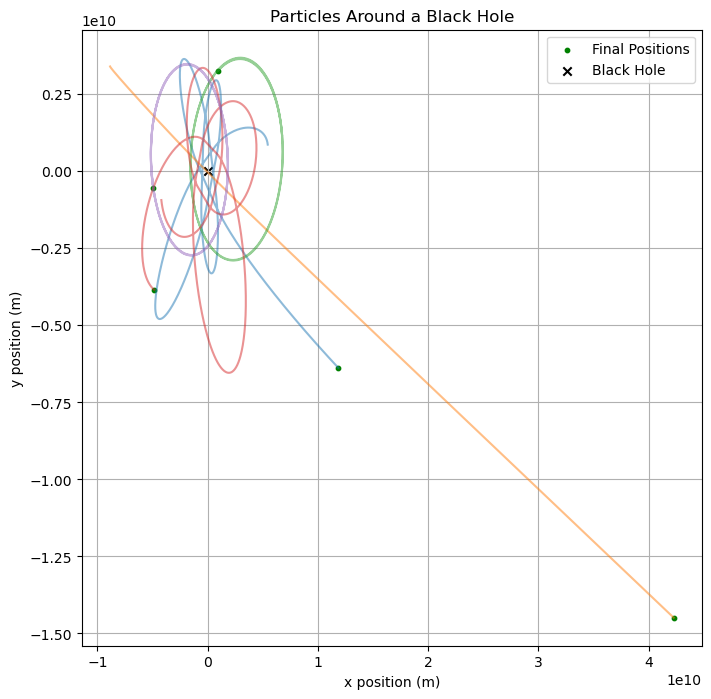

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Constants
G = 6.67430e-11  # Gravitational constant (m^3 kg^-1 s^-2)
M = 1e30  # Black hole mass (~1 solar mass)
dt = 1000  # Time step in seconds
num_steps = 500  # Number of simulation steps

# Particle initialization
num_particles = 5
radii = np.random.uniform(3e9, 1e10, num_particles)  # Random distances from BH (above Schwarzschild radius)
angles = np.random.uniform(0, 2*np.pi, num_particles)  # Random angles
positions = np.column_stack((radii * np.cos(angles), radii * np.sin(angles)))  # Convert to Cartesian

# Randomize initial velocities
velocities = np.zeros((num_particles, 2))
for i in range(num_particles):
    r = np.linalg.norm(positions[i])
    v_circular = np.sqrt(G * M / r)  # Circular velocity
    v_random = np.random.uniform(0, 1.5 * v_circular)  # Some below, some above circular speed
    velocities[i] = v_random * np.array([-np.sin(angles[i]), np.cos(angles[i])])  # Tangential velocity

# Gravity function
def compute_gravitational_force(positions):
    forces = np.zeros_like(positions)
    for i in range(len(positions)):
        r = np.linalg.norm(positions[i])
        if r < 1e9:  # Approaching event horizon (approximate Schwarzschild radius)
            continue  # Skip force calculation (simulate "falling in")
        force_magnitude = G * M / r**2
        force_direction = -positions[i] / r
        forces[i] = force_magnitude * force_direction
    return forces

# Update functions
def update_positions(positions, velocities, dt):
    return positions + velocities * dt

def update_velocities(velocities, forces, dt):
    return velocities + forces * dt

# Simulation function
def simulate_black_hole(positions, velocities, dt, num_steps):
    trajectories = np.zeros((num_steps, num_particles, 2))
    for step in range(num_steps):
        forces = compute_gravitational_force(positions)
        velocities = update_velocities(velocities, forces, dt)
        positions = update_positions(positions, velocities, dt)
        trajectories[step] = positions
    return trajectories, positions  # Return final positions

# Run the simulation
trajectories, final_positions = simulate_black_hole(positions, velocities, dt, num_steps)

# Plot the results
plt.figure(figsize=(8, 8))
for i in range(num_particles):
    plt.plot(trajectories[:, i, 0], trajectories[:, i, 1], alpha=0.5)

# Mark the final positions
plt.scatter(final_positions[:, 0], final_positions[:, 1], color='green', s=10, label='Final Positions')

# Indicate black hole
plt.scatter(0, 0, color='black', marker='x', label='Black Hole')  
plt.xlabel('x position (m)')
plt.ylabel('y position (m)')
plt.title('Particles Around a Black Hole')
plt.legend()
plt.grid()
plt.show()


Let's look at something within our neighborhood; Sagittarius A*! Using Kepler's third law, calculate the mass of the invisible object hurling a large star like S2 around. Remember you will need to look up (from an accredited source!) what the semi major axis of S2 is!

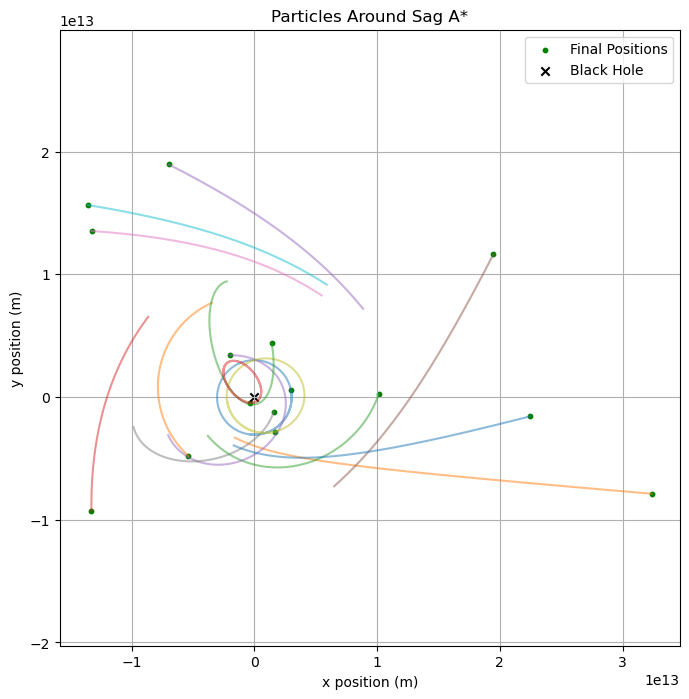

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# Constants
G = 6.67430e-11  # Gravitational constant
M = 7.056274e36 # Mass of Sagittarius A* FILL IN
c = 3e8
dt = 1000  # Time step in seconds (smaller time step for stability)
Rs = 2 * G * M / c**2  # Schwarzschild radius
num_particles = 15

# Particle initialization: Setting realistic distance range
positions = (np.random.rand(num_particles, 2) - 0.5) * 2e13  # Positions within 10s of millions of km
angles = np.arctan2(positions[:, 1], positions[:, 0])  # Get angles for correct tangential velocity

# Set initial velocities based on circular orbit speeds (adjusted for mass)
velocities = np.zeros((num_particles, 2))  # Initialize velocity array
for i in range(num_particles):
    r = np.linalg.norm(positions[i])  # Distance from the black hole
    v_circular = np.sqrt(G * M / r)  # Keplerian circular velocity
    v_random = np.random.uniform(0.3,2) * v_circular  # Slight variation for elliptical orbits
    velocities[i] = v_random * np.array([-np.sin(angles[i]), np.cos(angles[i])])  # Tangential velocity

# Gravitational force calculation
def compute_gravitational_force(positions):
    forces = np.zeros_like(positions)
    for i in range(len(positions)):
        r = np.linalg.norm(positions[i])
        if r <= Rs:  # Avoid very small distances (inside event horizon)
            continue
        force_magnitude = G * M / r**2
        force_direction = -positions[i] / r
        forces[i] = force_magnitude * force_direction
    return forces

# Update position and velocity functions
def update_positions(positions, velocities, dt):
    return positions + velocities * dt

def update_velocities(velocities, forces, dt):
    return velocities + forces * dt

# Simulation function
def simulate_black_hole(positions, velocities, dt, num_steps):
    trajectories = np.zeros((num_steps, num_particles, 2))
    for step in range(num_steps):
        forces = compute_gravitational_force(positions)
        velocities = update_velocities(velocities, forces, dt)
        positions = update_positions(positions, velocities, dt)
        trajectories[step] = positions
    return trajectories, positions

# Run the simulation
num_steps = 2000
trajectories, final_positions = simulate_black_hole(positions, velocities, dt, num_steps)

# Plot the results
plt.figure(figsize=(8, 8))
for i in range(num_particles):
    plt.plot(trajectories[:, i, 0], trajectories[:, i, 1], alpha=0.5)

# Mark the final positions
plt.scatter(final_positions[:, 0], final_positions[:, 1], color='green', s=10, label='Final Positions')

# Indicate black hole
plt.scatter(0, 0, color='black', marker='x', label='Black Hole')
plt.xlabel('x position (m)')
plt.ylabel('y position (m)')
plt.title('Particles Around Sag A*')
plt.legend()
plt.grid()
plt.axis('equal')
plt.show()



Plotting the orbit of S2 using infrared light to see through the dust around what appeared to be an invisible source of immense mass won the 2020 Nobel Prize in Physics! There were a list of papers published with the data but here is an example paper:
https://ui.adsabs.harvard.edu/abs/2005ApJ...620..744G/abstract